In [9]:
# coding: utf-8
# Install required libraries
# -m pip install tweepy
from collections import Counter
import csv
import logging
import os
from os import path
from pprint import pprint
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from PIL import Image
import conda
import lda
from matplotlib import  pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import mpl_toolkits
import numpy as np
import pandas as pd
import simplejson as json

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib
logging.getLogger("AnalyzeData").setLevel(logging.DEBUG)
from mpl_toolkits.basemap import Basemap


In [10]:

def read_data(file_content_name):
    content_data = []
    with open(file_content_name) as f:
        print(content)
        return content


def get_tokens(tweet_texts):
    tokenizer = TopicTokenizer()
    token_list = []
    for text in tweet_texts:
        if not text is np.nan: 
            list_tags = text.split(',')
            for tag in list_tags:
                token_list.append(tokenizer.tokenize(text))
    
    return token_list


def join_data(column):
    results = []
    for data in column:
        if not data is np.nan: 
            tokens = data.split(",");
            for t in tokens:
                results.append(t)
    
    return results



In [12]:

df = pd.read_csv("travel_content.csv",
                 names=["created_at", "text", "polarity", "subjectivity", "hashtags", "place_name",
                        "place_type", "place_fullname",
                        "place_country_code", "place_country",
                        "place_bounding_box_centroid_x", "place_bounding_box_centroid_y",
                        "place_bounding_box_coordinate1x", "place_bounding_box_coordinate1y",
                        "place_bounding_box_coordinate2x", "place_bounding_box_coordinate2y",
                        "place_bounding_box_coordinate3x", "place_bounding_box_coordinate3y",
                        "place_bounding_box_coordinate4x", "place_bounding_box_coordinate4y"
                        ])
# Passing tweet text to process token
df

,created_at,text,polarity,subjectivity,hashtags,place_name,place_type,place_fullname,place_country_code,place_country,place_bounding_box_centroid_x,place_bounding_box_centroid_y,place_bounding_box_coordinate1x,place_bounding_box_coordinate1y,place_bounding_box_coordinate2x,place_bounding_box_coordinate2y,place_bounding_box_coordinate3x,place_bounding_box_coordinate3y,place_bounding_box_coordinate4x,place_bounding_box_coordinate4y
0,Thu Jan 24 00:52:57 +0000 2019,I just wanna travel the world,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Thu Jan 24 00:52:57 +0000 2019,Yes please,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Thu Jan 24 00:52:58 +0000 2019,Klein Vars & JV soccer defeated Klein Oak Tues...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Thu Jan 24 00:52:59 +0000 2019,Just knowing that ima travel by myself soon is...,0.000000,0.000000,NaN,Los Angeles,city,"Los Angeles, CA",US,United States,-118.411907,34.020789,-118.668404,-118.668404,-118.155409,-118.155409,33.704538,34.337041,34.337041,33.704538
4,Thu Jan 24 00:53:00 +0000 2019,Add-On Item Crayola Travel Lap Desk with Stora...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Thu Jan 24 00:53:00 +0000 2019,Lmao nah fr,0.600000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Thu Jan 24 00:53:01 +0000 2019,"Bhutan, amazing and beautiful. Remote and myst...",0.462500,0.650000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Thu Jan 24 00:53:03 +0000 2019,"@VP Put Ivanka in charge of ""BUILD THAT WALL""...",0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Thu Jan 24 00:53:05 +0000 2019,"@juliettekayyem shutdown air travel, the govt ...",0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Thu Jan 24 00:53:05 +0000 2019,Planning a weekend getaway? Why not stay in o...,0.678571,0.417857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


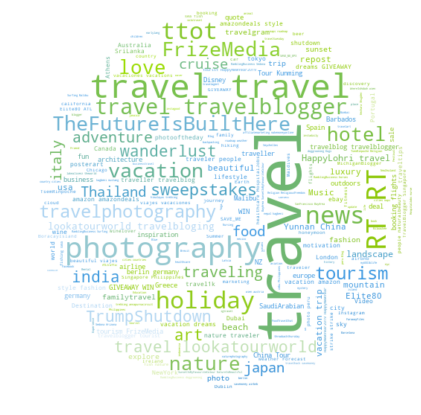

In [13]:
hashtags_column = df["hashtags"].values  # text column
all_hashtags = join_data(hashtags_column)
# token_list = get_tokens(tweet_texts)

# wordcount = Counter(all_hashtags)
# for word in wordcount:
#     print(word)
#     print(wordcount[word]);
#     
# print(all_hashtags)

# stopwords = set(STOPWORDS)
# stopwords.update(all_hashtags)
stopwords = [];
# https://www.flaticon.com/free-icon/world-map_290185#term=world%20map&page=3&position=19
# Generate a word cloud image
# image_name = "world-map.png"
image_name = "earth-globe.png"
mask = np.array(Image.open(image_name))
wordcloud = WordCloud(stopwords=stopwords,
                          background_color="white",
                          mode="RGBA",
                          max_words=1000, mask=mask).generate(",".join(all_hashtags))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7, 7])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("wordcloud.png", format="png")
plt.show()

In [14]:
# ## Analyze location and sentiment
# TODO group data by city and analyze sentiment

# drop NaN row at city 
# "place_bounding_box"
df_sentiment = df.drop(['created_at', 'text', 'place_type', "hashtags", "place_type", "place_fullname",
                        "place_country_code", "place_country"], axis=1)
df_sentiment = df_sentiment.dropna(subset=['place_name'])
sort_by_city = df_sentiment.sort_values("place_name")
sort_by_city.head(n=100)

,polarity,subjectivity,place_name,place_bounding_box_centroid_x,place_bounding_box_centroid_y,place_bounding_box_coordinate1x,place_bounding_box_coordinate1y,place_bounding_box_coordinate2x,place_bounding_box_coordinate2y,place_bounding_box_coordinate3x,place_bounding_box_coordinate3y,place_bounding_box_coordinate4x,place_bounding_box_coordinate4y
3649,0.250000,0.644444,Accra,-0.184293,5.623199,-0.347025,-0.347025,-0.021562,-0.021562,5.517130,5.729267,5.729267,5.517130
4101,0.300000,0.666667,Accra,-0.184293,5.623199,-0.347025,-0.347025,-0.021562,-0.021562,5.517130,5.729267,5.729267,5.517130
3636,-0.250000,0.500000,Accra,-0.184293,5.623199,-0.347025,-0.347025,-0.021562,-0.021562,5.517130,5.729267,5.729267,5.517130
2004,0.000000,0.000000,Adelaide,138.611160,-35.000767,138.442130,138.442130,138.780190,138.780190,-35.348970,-34.652564,-34.652564,-35.348970
4966,0.200000,0.100000,Alajuela,-84.800132,10.451324,-85.442230,-85.442230,-84.158035,-84.158035,9.823332,11.079316,11.079316,9.823332
1588,0.000000,0.100000,Alexandria,-77.090869,38.817380,-77.144435,-77.144435,-77.037304,-77.037304,38.789907,38.844853,38.844853,38.789907
735,1.000000,0.300000,Alexandria,-77.090869,38.817380,-77.144435,-77.144435,-77.037304,-77.037304,38.789907,38.844853,38.844853,38.789907
866,0.000000,0.000000,Alexandria,-77.090869,38.817380,-77.144435,-77.144435,-77.037304,-77.037304,38.789907,38.844853,38.844853,38.789907
50,0.000000,0.000000,Amphoe Phatthana Nikhom,101.063906,14.898811,100.845738,100.845738,101.282075,101.282075,14.741172,15.056449,15.056449,14.741172
635,0.042857,0.796429,Apple Valley,-93.202438,44.746673,-93.248871,-93.248871,-93.156006,-93.156006,44.717447,44.775899,44.775899,44.717447


In [15]:
# group by city and find mean
sum_data = df_sentiment.groupby(['place_name'])['polarity', 'subjectivity'].mean().reset_index()
sum_data

,place_name,polarity,subjectivity
0,Accra,0.100000,0.603704
1,Adelaide,0.000000,0.000000
2,Alajuela,0.200000,0.100000
3,Alexandria,0.333333,0.133333
4,Amphoe Phatthana Nikhom,0.000000,0.000000
5,Apple Valley,0.042857,0.796429
6,Arkansas,0.000000,0.500000
7,Atlanta,-0.178571,0.285714
8,Baguio City,-0.042969,0.612500
9,Bahamas,0.011111,0.244444


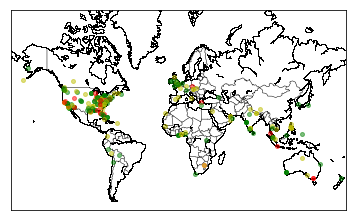

break


In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
# set resolution='h' for high quality
map = Basemap(projection='merc',
               llcrnrlat=-60,
               urcrnrlat=80,
               llcrnrlon=-180,
               urcrnrlon=180,
               lat_ts=20,
               resolution='c')

# 
# draw elements onto the world map
map.drawcountries()
map.drawcoastlines(antialiased=False,
                      linewidth=0.005)

cities = df_sentiment['place_name'].values
for city in cities:
    centroid_long = df_sentiment.loc[df_sentiment['place_name'] == city]['place_bounding_box_centroid_x'].values[0]
    centroid_lat = df_sentiment.loc[df_sentiment['place_name'] == city]['place_bounding_box_centroid_y'].values[0]
    mean_polarity = sum_data.loc[sum_data['place_name'] == city]['polarity'].values[0]
    color = ""
    if mean_polarity == 0:
        # neutral
        color = 'yo'
    elif mean_polarity > 0:
        # positive
        color = 'go'
    else:
        # negative
        color = 'ro'
    x, y = map(centroid_long, centroid_lat)  
    map.plot(x, y, color, markersize=4, alpha=0.5) 
plt.show()